# Talbot effect

In [1]:
from diffractio import plt, sp, np, um, mm
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ

number of processors: 8


In [24]:
from matplotlib import rcParams
rcParams['figure.figsize']=(15,10)

In [17]:
x = np.linspace(-350*um, 350*um, 2048)
z = np.linspace(0*um, 10*mm, 512)
wavelength = 0.6238 * um
period=40 * um
z_talbot=2*period**2/wavelength

## No edge effects

In [18]:
u0=Scalar_source_X(x,wavelength)
u0.plane_wave(A=1)

t=Scalar_mask_X(x,wavelength)
t.ronchi_grating(period=40*um, x0=0 * um, fill_factor=0.5)

talbot_effect = Scalar_field_XZ(x, z, wavelength)
talbot_effect.incident_field(u0*t)
talbot_effect.BPM()

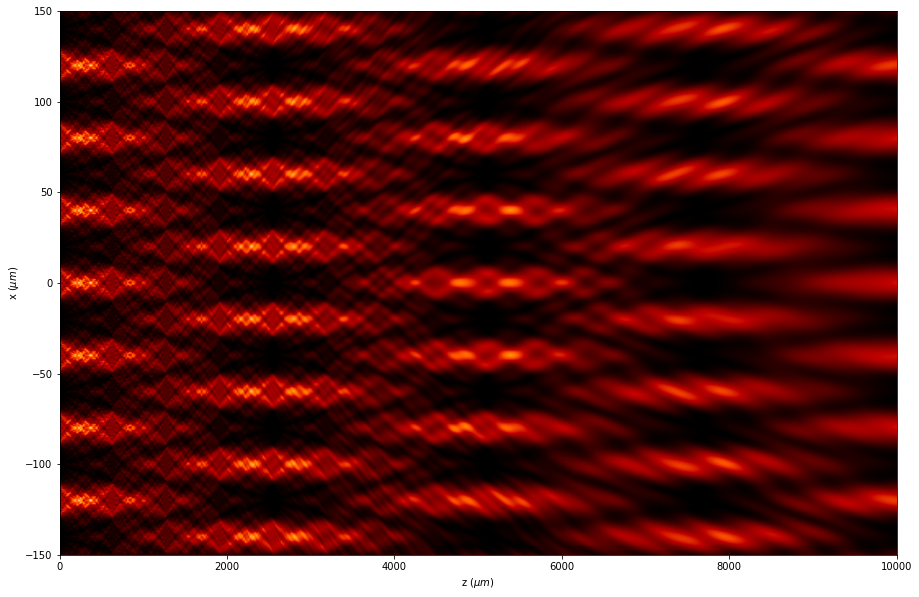

In [19]:
talbot_effect.draw(kind='intensity')
plt.ylim(-150*um, 150*um);

## Gauss illumination: separation of orders

In [20]:
u0=Scalar_source_X(x,wavelength)
u0.gauss_beam( x0=0*um, w0=150*um, z0=0*um, A=1, theta=0.0)

t=Scalar_mask_X(x,wavelength)
t.ronchi_grating(period=15*um, x0=0 * um, fill_factor=0.5)

talbot_effect = Scalar_field_XZ(x, z, wavelength)
talbot_effect.incident_field(u0*t)
talbot_effect.BPM()

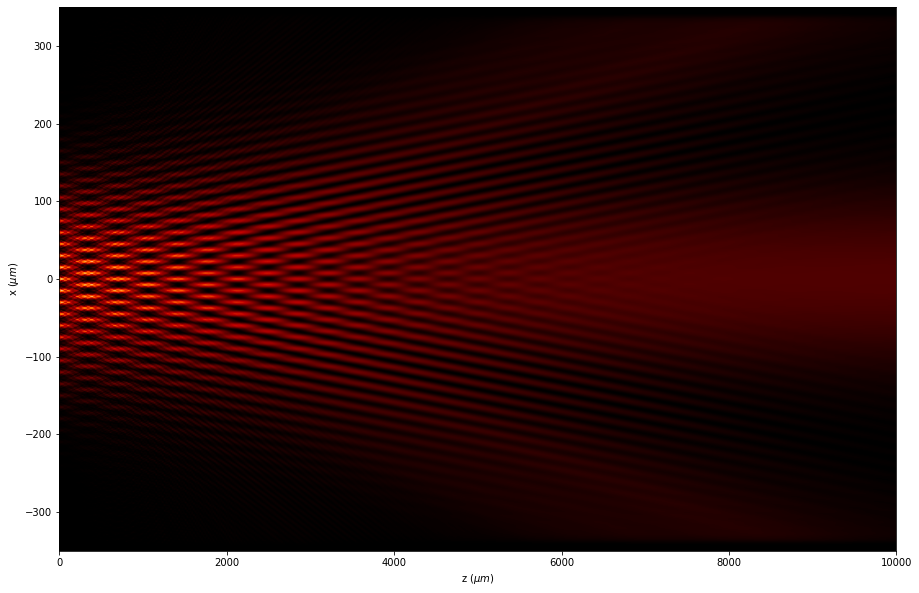

In [21]:
talbot_effect.draw(kind='intensity', logarithm=True);